# Part I - (PROSPER LOAN DATA)
## by (Samuel Gichobi)

## Introduction
> Prosper Score Loans Data




## Preliminary Wrangling


In [1]:
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None )

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
fin_data = pd.read_csv('prosperLoanData.csv')

In [4]:
print(fin_data.shape)
fin_data.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
fin_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
fin_data.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [8]:
sum(fin_data.duplicated())

0

In [9]:
fin_data.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

### What is the structure of your dataset?

> The data set is on the propser loan data that examines the number of people who have completed their loans or not. The data set contains 113937 columns and 81 rows.

### What is/are the main feature(s) of interest in your dataset?

> The main interest from this dataset is to examine the factors that influence the loan status and if more people currently have loans, defaulted, or paid off their loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some of the features that I will consider exploring in this data include LoanStatus, borrowerate, lender yield, ProsperScore, occupation, Term, Employment Status, Employment Status Duration, IsBorrowerHomeowner,Total Credit Lines Past 7 Years, Delinquencies Last 7 Years, Debt to Income Ratio, Income Range, Income Verifiable, Loan Orginal Date, Loan Orginal AMount, Monthly Repayment, 

Data Warangling

Addressing Quality Issues (Messy Data)

In [10]:
fin_data.drop(columns = ['ListingKey','ListingNumber', 'CreditGrade', 'BorrowerAPR','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)','ListingCategory (numeric)','CurrentlyInGroup','GroupKey','DateCreditPulled','CreditScoreRangeLower','CreditScoreRangeUpper','FirstRecordedCreditLine','CurrentCreditLines','OpenCreditLines','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','AmountDelinquent','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades','TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','LoanKey','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination','LoanNumber','LoanOriginationQuarter','MemberKey','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','PercentFunded','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors'],inplace = True)

In [11]:
fin_data.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerRate,LenderYield,ProsperScore,BorrowerState,Occupation,EmploymentStatus,...,IsBorrowerHomeowner,TotalCreditLinespast7years,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,09:29.3,36,Completed,8/14/2009 0:00,0.1580,0.1380,NaN,CO,Other,Self-employed,...,True,12.0,4.0,0.17,"$25,000-49,999",True,3083.333333,9425,9/12/2007 0:00,330.43
1,28:07.9,36,Current,NaN,0.0920,0.0820,7.0,CO,Professional,Employed,...,False,29.0,0.0,0.18,"$50,000-74,999",True,6125.000000,10000,3/3/2014 0:00,318.93
2,00:47.1,36,Completed,12/17/2009 0:00,0.2750,0.2400,NaN,GA,Other,Not available,...,False,3.0,0.0,0.06,Not displayed,True,2083.333333,3001,1/17/2007 0:00,123.32
3,02:35.0,36,Current,NaN,0.0974,0.0874,9.0,GA,Skilled Labor,Employed,...,True,29.0,14.0,0.15,"$25,000-49,999",True,2875.000000,10000,11/1/2012 0:00,321.45
4,38:39.1,36,Current,NaN,0.2085,0.1985,4.0,MN,Executive,Employed,...,True,49.0,0.0,0.26,"$100,000+",True,9583.333333,15000,9/20/2013 0:00,563.97


Work on the Data Types such as Date

In [12]:
fin_data['LoanOriginationDate'] = pd.to_datetime(fin_data['LoanOriginationDate'], errors = 'coerce').dt.strftime('%d-%m-%y')

In [13]:
fin_data['ListingCreationDate'] = pd.to_datetime(fin_data['ListingCreationDate'], errors = 'coerce').dt.strftime('%d-%m-%y')

In [14]:
fin_data['ClosedDate'] = pd.to_datetime(fin_data['ClosedDate'], errors = 'coerce').dt.strftime('%d-%m-%y')

In [15]:
fin_data.set_index('LoanOriginationDate', inplace = True)

In [16]:
fin_data.sort_index(inplace = True)

In [17]:
fin_data.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerRate,LenderYield,ProsperScore,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
LoanOriginationDate,,,,,,,,,,,,,,,,,,,,
01-02-07,NaN,36,Defaulted,30-06-07,0.2900,0.2850,NaN,CA,Social Worker,Not available,NaN,False,17.0,20.0,0.06,Not displayed,True,2134.000000,2950,123.62
01-02-07,13-10-22,36,Defaulted,31-07-07,0.2700,0.2350,NaN,GA,Other,Not available,NaN,False,5.0,3.0,0.02,Not displayed,True,6250.000000,3001,122.52
01-02-07,13-10-22,36,Completed,17-05-07,0.0745,0.0695,NaN,NaN,Computer Programmer,Not available,NaN,False,15.0,0.0,0.03,Not displayed,True,5208.333333,5000,155.42
01-02-07,NaN,36,Chargedoff,02-05-10,0.1400,0.1300,NaN,NaN,Student - College Senior,Not available,NaN,False,15.0,0.0,0.34,Not displayed,True,808.833333,1500,51.27
01-02-07,13-10-22,36,Chargedoff,02-07-09,0.2400,0.2350,NaN,NaN,Teacher,Not available,NaN,True,63.0,15.0,0.20,Not displayed,True,5833.333333,1500,58.85


Enhance consistency by ensuring values are all in small letters

In [18]:
fin_data.rename(columns = lambda x:x.strip().lower().replace('', ''), inplace = True)

In [19]:
fin_data.head()

,listingcreationdate,term,loanstatus,closeddate,borrowerrate,lenderyield,prosperscore,borrowerstate,occupation,employmentstatus,employmentstatusduration,isborrowerhomeowner,totalcreditlinespast7years,delinquencieslast7years,debttoincomeratio,incomerange,incomeverifiable,statedmonthlyincome,loanoriginalamount,monthlyloanpayment
LoanOriginationDate,,,,,,,,,,,,,,,,,,,,
01-02-07,NaN,36,Defaulted,30-06-07,0.2900,0.2850,NaN,CA,Social Worker,Not available,NaN,False,17.0,20.0,0.06,Not displayed,True,2134.000000,2950,123.62
01-02-07,13-10-22,36,Defaulted,31-07-07,0.2700,0.2350,NaN,GA,Other,Not available,NaN,False,5.0,3.0,0.02,Not displayed,True,6250.000000,3001,122.52
01-02-07,13-10-22,36,Completed,17-05-07,0.0745,0.0695,NaN,NaN,Computer Programmer,Not available,NaN,False,15.0,0.0,0.03,Not displayed,True,5208.333333,5000,155.42
01-02-07,NaN,36,Chargedoff,02-05-10,0.1400,0.1300,NaN,NaN,Student - College Senior,Not available,NaN,False,15.0,0.0,0.34,Not displayed,True,808.833333,1500,51.27
01-02-07,13-10-22,36,Chargedoff,02-07-09,0.2400,0.2350,NaN,NaN,Teacher,Not available,NaN,True,63.0,15.0,0.20,Not displayed,True,5833.333333,1500,58.85


Drop Missing Values in the occupation as individuals with no employmentduration may not have employmentduration or employment status and we want to determine the completion and default rate for people who have an occupation.

In [20]:
fin_data[fin_data['occupation'].isna()].head()

,listingcreationdate,term,loanstatus,closeddate,borrowerrate,lenderyield,prosperscore,borrowerstate,occupation,employmentstatus,employmentstatusduration,isborrowerhomeowner,totalcreditlinespast7years,delinquencieslast7years,debttoincomeratio,incomerange,incomeverifiable,statedmonthlyincome,loanoriginalamount,monthlyloanpayment
LoanOriginationDate,,,,,,,,,,,,,,,,,,,,
01-03-06,NaN,36,Completed,01-03-09,0.1460,0.1410,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0.15773,Not displayed,True,3500.000000,6500,218.58
01-03-06,13-10-22,36,Defaulted,30-06-07,0.2300,0.2125,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0.04387,Not displayed,True,2250.000000,2550,98.71
01-03-06,NaN,36,Completed,28-05-08,0.0775,0.0725,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0.22387,Not displayed,True,3333.333333,1000,31.22
01-03-06,13-10-22,36,Completed,06-04-07,0.0712,0.0650,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0.10155,Not displayed,True,5288.000000,5000,154.66
01-03-06,13-10-22,36,Completed,01-03-09,0.1000,0.0950,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0.07305,Not displayed,True,2666.666667,3000,95.24


In [21]:
fin_data.dropna(subset = ['occupation'], how = 'all', inplace = True)

In [22]:
sum(fin_data['occupation'].isna())

0

In [23]:
#Get the various categories
fin_data['prosperscore'].value_counts()

4.0     12257
6.0     12126
8.0     11942
7.0     10448
5.0      9683
3.0      7436
9.0      6875
2.0      5619
10.0     4712
11.0     1436
1.0       986
Name: prosperscore, dtype: int64

In [24]:
#Get numeric variables
fin_data.describe()

,term,borrowerrate,lenderyield,prosperscore,employmentstatusduration,totalcreditlinespast7years,delinquencieslast7years,debttoincomeratio,statedmonthlyincome,loanoriginalamount,monthlyloanpayment
count,110349.000000,110349.000000,110349.000000,83520.000000,104985.000000,110261.000000,110261.000000,101824.000000,1.103490e+05,110349.000000,110349.000000
mean,40.930974,0.193051,0.182964,5.964966,96.213173,26.816753,4.093134,0.277591,5.640072e+03,8420.489175,274.977225
std,10.529928,0.075020,0.074739,2.375933,93.758935,13.639361,10.056597,0.555220,7.567519e+03,6268.163763,193.179240
min,12.000000,0.000000,-0.010000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000
25%,36.000000,0.134000,0.124400,4.000000,26.000000,17.000000,0.000000,0.150000,3.250000e+03,4000.000000,134.280000
50%,36.000000,0.184000,0.174000,6.000000,67.000000,25.000000,0.000000,0.220000,4.666667e+03,6500.000000,222.210000
75%,36.000000,0.251100,0.241100,8.000000,137.000000,35.000000,3.000000,0.320000,6.833333e+03,12000.000000,373.770000
max,60.000000,0.360000,0.340000,11.000000,755.000000,136.000000,99.000000,10.010000,1.750003e+06,35000.000000,2251.510000


In [25]:
#Convert loanstatus,income_range, employmentstatus,
ordinal_var_dict = {'employmentstatus': ['Employed','Full-time','Part-time','Self-employed','Retired','Other','Not employed','Not available'],
                    'incomerange':['0','Not displayed','Not employed', '$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                   'loanstatus': ['Current','Completed','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Chargedoff','Defaulted','Cancelled']}     
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    fin_data[var] = fin_data[var].astype(ordered_var)

In [26]:
#Categorize the Variable into Categorical and Numeric
categoric_var = ['loanstatus','employmentstatus','incomerange']
numeric_var = ['term', 'borrowerrate','lenderyield','prosperscore','employmentstatusduration','totalcreditlinespast7years','delinquencieslast7years','debttoincomeratio','statedmonthlyincome','loanoriginalamount','monthlyloanpayment']

## Univariate Exploration







In [27]:
#Set the style of displaying the Visual
plt.style.use('ggplot')

Question 1: What is the count of the Loan Status?

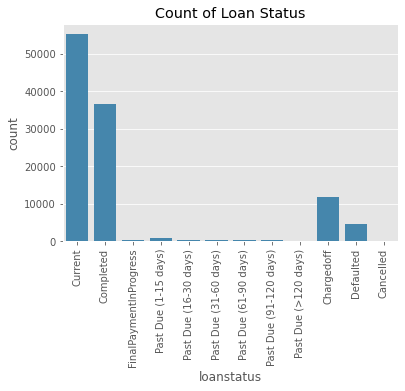

In [28]:
#Get the defualt color
default_color = sb.color_palette()[1]
#plot the bar graph of count of oan status
sb.countplot(data = fin_data, x = 'loanstatus', color = default_color)
#Rotate the x axis
plt.xticks(rotation = '90')
plt.title('Count of Loan Status')
plt.show()

The plot above shows that the count of the current is high which denotes that the number of people with loans is high.
On a positive note, those who have  paid their loans is equally high followed by the numbers of those who charged off and defualted. The number of people who have their loans overdue by a certain number of days is low and those who have cancelled have the lowest count.

Question 2: What is the count of the Prosperscore?

Text(0.5, 1.0, 'Count of Prosper Score')

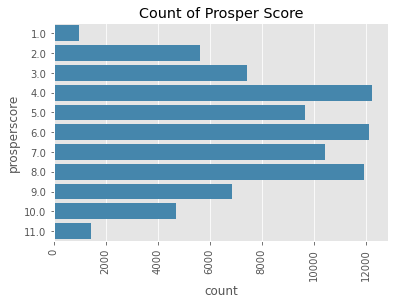

In [29]:
#Get the default Color
default_color = sb.color_palette()[1]
#Plot the bar Graph of Count
sb.countplot(data = fin_data, y = 'prosperscore', color = default_color)
#Rotate the x axis
plt.xticks(rotation = '90')
plt.title('Count of Prosper Score')

The plot shows that loans of a degree of risk 4.0 are the highest with people taking less risker loans with a prosper score of 11.0 but also do not prefer very low risk loans of a prosper score of 1.0. Therefore, most people prefer loans with a prosper score of between 4.0 to 8.0.

Question 3: What is the count for employment status and income range? Is there any correlation?

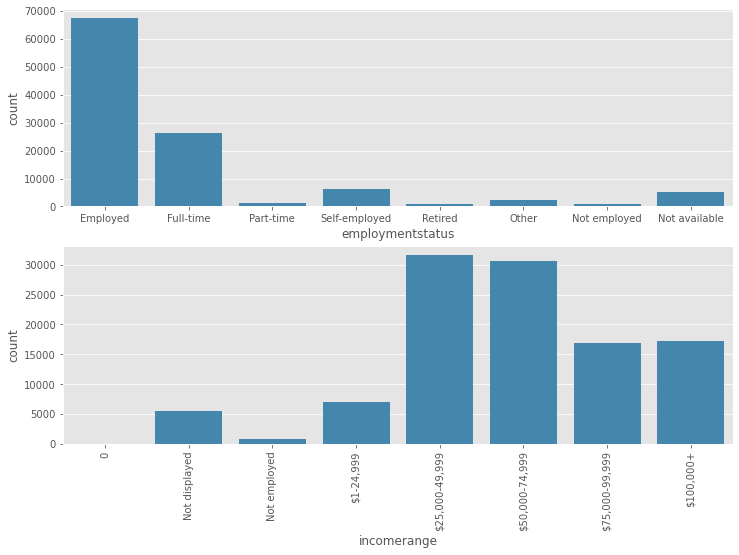

In [30]:
#Get the subplots
fig, ax = plt.subplots(nrows = 2, figsize = (12,8))
#Get the default color
default_color = sb.color_palette()[1]
#Plot
sb.countplot(data = fin_data, x = 'employmentstatus', color = default_color, ax = ax[0])
#Rotate the 
plt.xticks(rotation = '90')
sb.countplot(data = fin_data, x = 'incomerange', color = default_color, ax = ax[1])
plt.show()

The graph examined th count of emloyment status and it was evident that the number of employed people were high while the least number were those who had retired. From the count, most individual's income was between 25,000-49,999 dollars and $50,000-74,999. Therefore, employment status maybe correlated to income range with most employed people falling in the first two income bracket. Another correlation my be denoted from the not employed in both graphs whihch is low in both visuals.

In [31]:
fin_data['borrowerrate'].describe()

count    110349.000000
mean          0.193051
std           0.075020
min           0.000000
25%           0.134000
50%           0.184000
75%           0.251100
max           0.360000
Name: borrowerrate, dtype: float64

Question: What is the distribution of the borrowerrate across the dataset?  Is it skewed, unimodal, bimodal or multimodal?

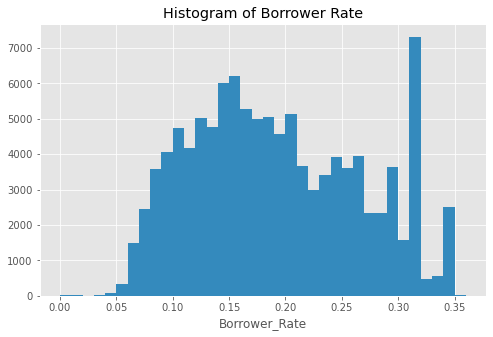

In [32]:
#Get the bin_edges
bin_edges = np.arange(0, fin_data['borrowerrate'].max()+0.01, 0.01)
#Get the default color
default_color = sb.color_palette()[1]
#Plot the Histogram
plt.figure(figsize = (8,5))
plt.hist(data = fin_data, x = 'borrowerrate', bins = bin_edges, color = default_color)
#Plot the X label & Title
plt.xlabel('Borrower_Rate')
plt.title('Histogram of Borrower Rate')
plt.show()

From the data visual, it can be observed that the data appesrs to be unimodal with a high peak between 0.15 and 0.20 and spikes between 0.30 and 0.35. Therefore, the high spikes need to be investigated further between 0.30 and 0.35 wiith the rate that applied to most borrowers falling between 0.15 and 0.20.

Question: What is the distribution of the lenderyield across the dataset?  Is it skewed, unimodal, bimodal or multimodal?

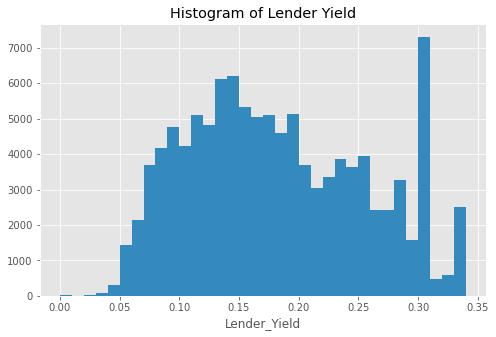

In [33]:
#Get the binsizes
bins = np.arange(0, fin_data['lenderyield'].max()+0.01, 0.01)
#Get the default color
default_color = sb.color_palette()[1]
#Plot the Graph
plt.figure(figsize = (8,5))
plt.hist(data = fin_data, x = 'lenderyield', bins = bins, color = default_color)
#Label the x axis
plt.xlabel('Lender_Yield')
plt.title('Histogram of Lender Yield')
plt.show()

Here, we observe a keen relation between borrower rate and lender yield with a similar distribution to the borrowerate. Therefore, the data set is  unimodal with one major top and the spikes which need to be investigated further to determine the cause of these spikes. Were there regulatory measures that caused a temporary rise in borrower rates and lender yield.

In [34]:
fin_data['isborrowerhomeowner'].value_counts()

True     56279
False    54070
Name: isborrowerhomeowner, dtype: int64

Question: Did majority of those who borrowed loans own a home or not?

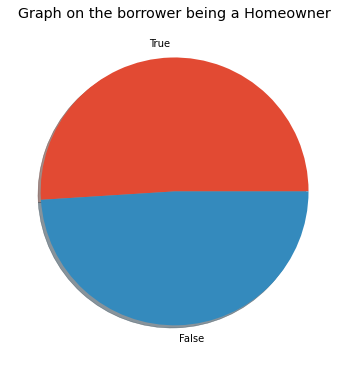

In [35]:
#Get the array
y = np.array([56279,54070])
#Get the size
plt.figure(figsize = (6,8))
#Create labels
my_labels = ['True', 'False']
#Plot the pie chart
plt.pie(y, labels = my_labels, shadow = True)
plt.title('Graph on the borrower being a Homeowner')
plt.show()

The data visual revealed that the difference between whether the person owned a home  or not was less.  However, most people who borrowed loans were not home owners but at the same time a good number of those who borrowed were home owners with the disparity between these two groups almost insignificant.

Question: Was the income of those who borrowed verifiable?

In [36]:
#Get the number of True or False of the income verifiable
fin_data['incomeverifiable'].value_counts()

True     101719
False      8630
Name: incomeverifiable, dtype: int64

Text(0.5, 1.0, 'Doghnut Chart of Income Verifiable')

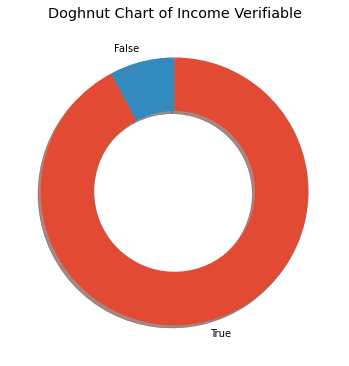

In [37]:
#Get the array
y = np.array([101719, 8630])
#Get the size
plt.figure(figsize = (6,8))
#Grab the labels
my_labels = ['True', 'False']
#Plot the doghnut chart
plt.pie(y, labels = my_labels, shadow = True, startangle = 90, counterclock = False, wedgeprops = {'width':0.4})
plt.title('Doghnut Chart of Income Verifiable')

From the doughnut chart, it can be observed that the number of borrowers whose income is verifiable was higher compared to those whose income cannot be verified. Therefore, these borrowers with unverified income should not be allowed to borrow as their source of income is questionable.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the first part of univariate graphs, I examined loan status, employment status, income verifiable, homeowner, income range, borrower rate, and lender yield. The factor of interest that I was to investigate was loan status and examined them along with these factors.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the dataset, several transformations such as on the datetime was done and equally some columns from the employment duartion status were dropped. Besides that all other aspects including the data type were conistent (Still leave room for iteration) in the dataset. More so, one of the aspects I noticed was that employment status and income range my be  correlated with most people employed may fall within the first two income bracket. I also noticed the strong positive correlation between lender yield and borrower rate. However, an unusual aspect to notice was the high spikes which could be seen betwen 0.30 and 0.35.

## Bivariate Exploration



Question: What is the correlation between numeric variables?

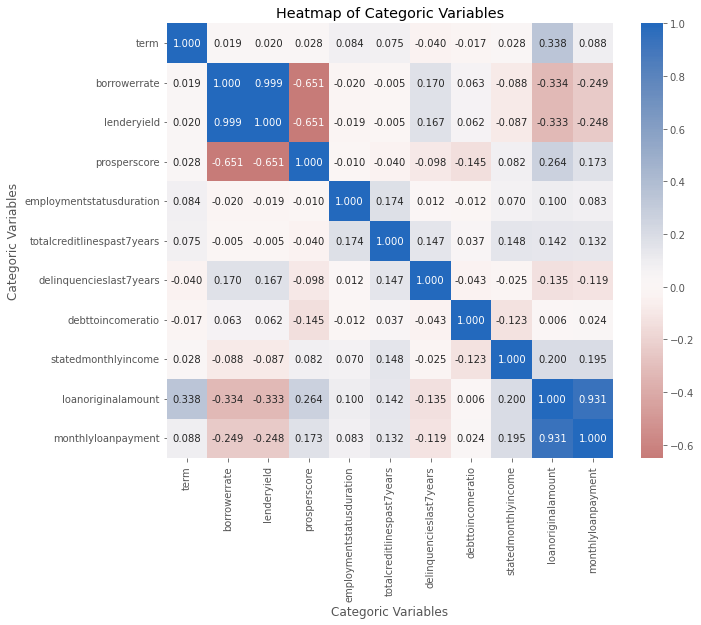

In [38]:
#Get the plot size
plt.figure(figsize = (10,8))
#Plot the graph
sb.heatmap(fin_data[numeric_var].corr(),annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Heatmap of Categoric Variables')
#Create the x and y labels
plt.xlabel('Categoric Variables')
plt.ylabel('Categoric Variables')
plt.show()

The heatmap denotes the relationship between numeric variables. A strong positive correlation is between 0.5 and 1 while weak relationship falls between 0 and 0.4. A strong negative relationship is denoted by a figure of between -0.5 and -1 while a weak negative relation is between -0.4 and 0. A neutral or no correlation exists when the value between the two variables is 0. For instance, we can observe the strong positive correlation between lender yield and borrowerrate of 0.999 (0.5 < 1) .

Question 2: What is the relationship between numeric variables for the first 500 samples?

Fin_Data Sample = (500, 20)


<Figure size 720x720 with 0 Axes>

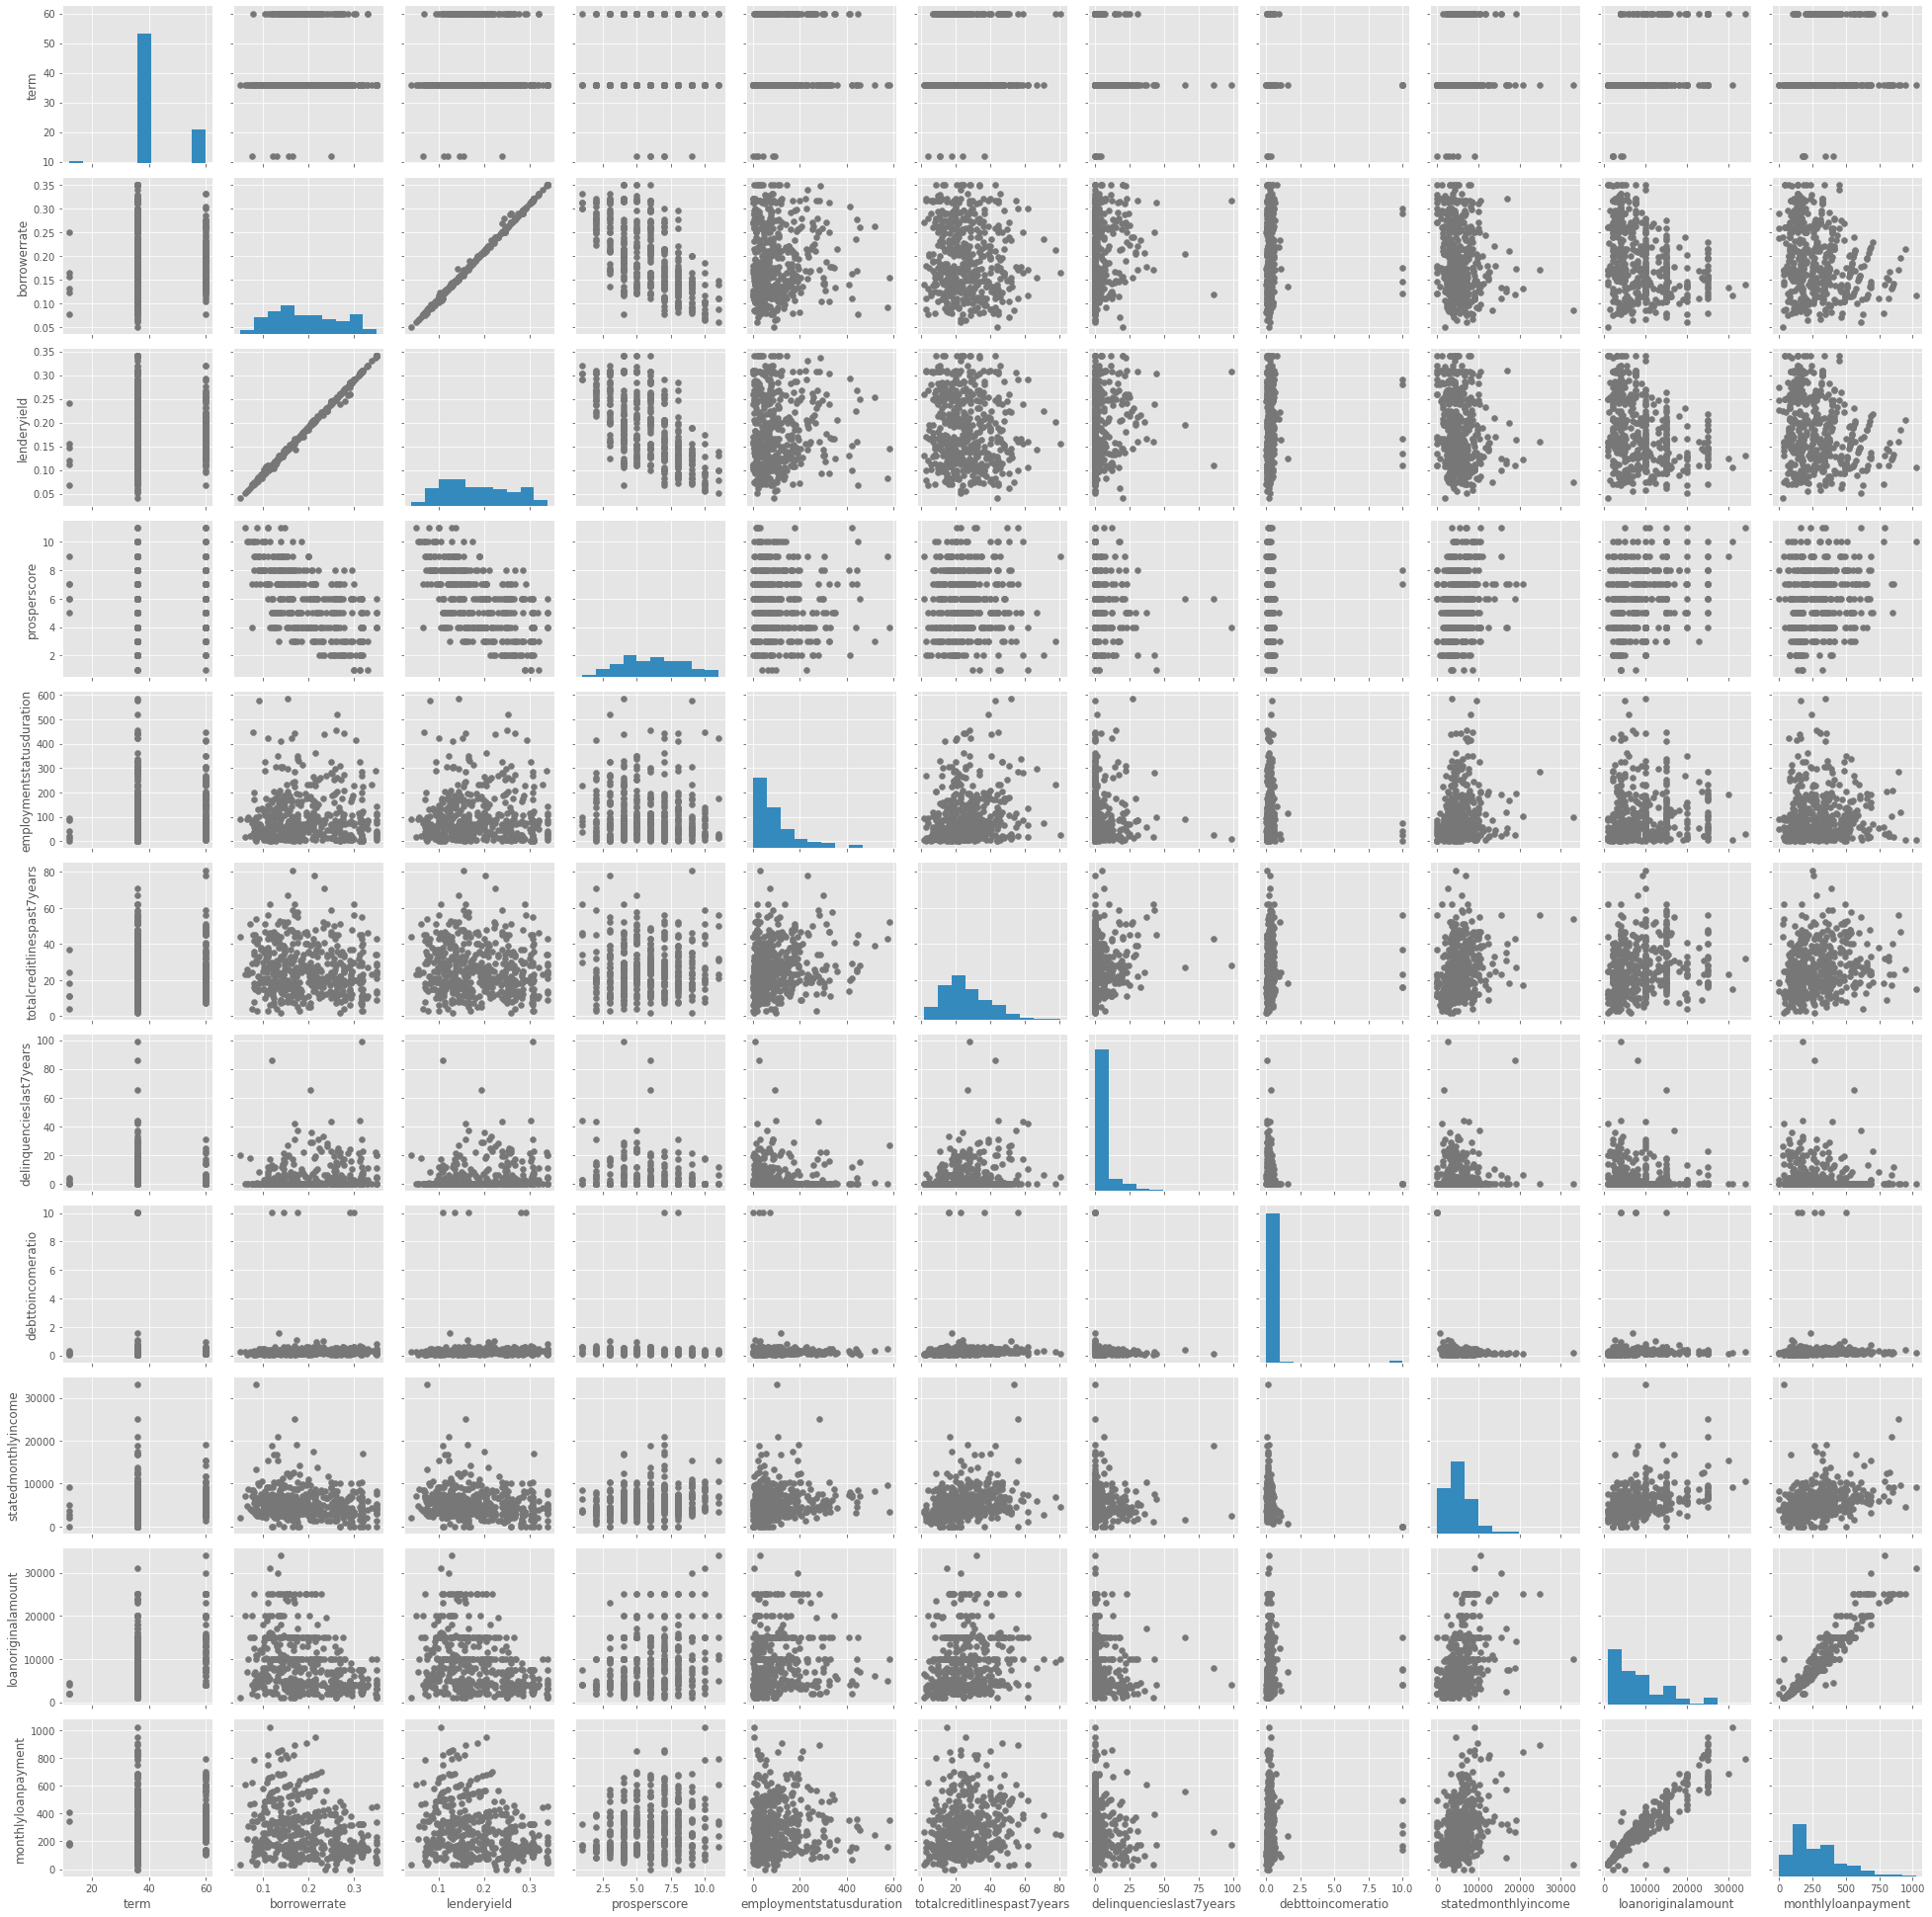

In [39]:
#Get the size
plt.figure(figsize = (10,10))
#Get the default color 
default_color = sb.color_palette()[1]
default_color_1 = sb.color_palette()[3]

#Plot the graph
fin_data_samp = fin_data.sample(n = 500, replace = False)
print('Fin_Data Sample =', fin_data_samp.shape)
g = sb.PairGrid(data = fin_data_samp, vars = numeric_var)
#Maping as histogram and scatter plot
g = g.map_diag(plt.hist, bins = 10, color = default_color)
g.map_offdiag(plt.scatter, color = default_color_1)

From the pairgrid we can better ascertain the weak or strong positive or negative relationship among the numeric variables by mapping histograms and scatter plots. Therefore, we can see the strong and positive relationship between lender yield and borrower rate.

Question 3: What is the relationship between Lender yield and Borrower rate?

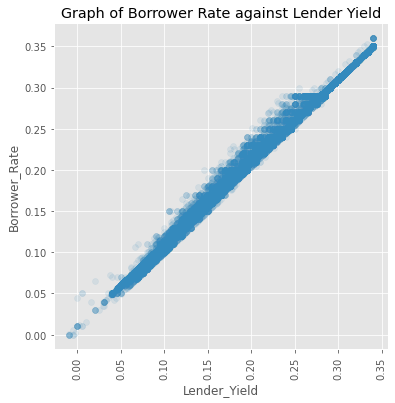

In [40]:
#Get the size
plt.figure(figsize = (6,6))
#Get the color
default_color = sb.color_palette()[1]
#Plot the graph
plt.scatter(data = fin_data, x = 'lenderyield', y = 'borrowerrate', alpha = 1/10, color = default_color)
#Rotate the axis
plt.xticks(rotation = '90')
#Get the x and y labels & Title
plt.xlabel('Lender_Yield')
plt.ylabel('Borrower_Rate')
plt.title('Graph of Borrower Rate against Lender Yield')
plt.show()

From the heatmap, pairgrid, and the scatterplot we can see the strong and direct relationship between lender yield and borrower rate with most borrowers receiving a borrower rate of between 0.15 and 0.27 and and equally high lender yields of between 0.12 and 0.25. Therefore, a change in lender yield will result in a similar change in borrower rate in the same direction, and could it be that these loans are slightly expensive or cheaper for borrowers and do lending bodies  receive higher profits?

Question 4: What is the debt to income ratio in relation to the total credit lines in the past 7 years?

In [41]:
fin_data['totalcreditlinespast7years'].value_counts().head()

21.0    3457
22.0    3414
20.0    3386
25.0    3369
19.0    3368
Name: totalcreditlinespast7years, dtype: int64

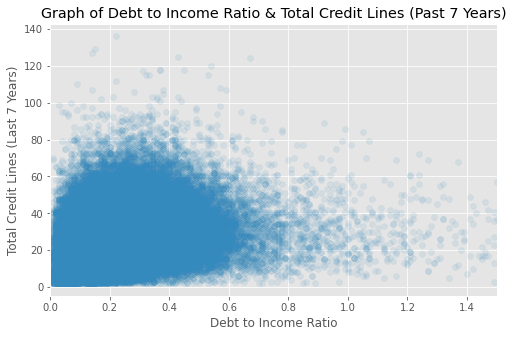

In [42]:
#Get the size
plt.figure(figsize = (8,5))
#Get the default color
default_color = sb.color_palette()[1]
#Plot the Graph
plt.scatter(data = fin_data, y = 'totalcreditlinespast7years', x= 'debttoincomeratio',alpha = 1/10, color = default_color)
#Label the axeses and title
plt.ylabel('Total Credit Lines (Last 7 Years)')
plt.xlabel('Debt to Income Ratio')
plt.title('Graph of Debt to Income Ratio & Total Credit Lines (Past 7 Years)')
#Place the limitation on the X axis
plt.xlim([0,1.5])
plt.show()

From the scatter plot, it can be observed that a low debt to income ratio of borrowers causes them to have more total credit lines within the past 7 years. Therefore, there is an inverse relationship between the debt to income ratio and the total credit lines in the past 7 years. An increase in the debt to income ratio as people are restricted to borrow more, have less total credit lines.

In [43]:
#Get the rate of default per year
fin_data['LoanYear'] = pd.DatetimeIndex(fin_data['listingcreationdate']).year

In [44]:
#Get defualted loans
defaulted = fin_data.loc[fin_data['loanstatus'].isin(['Defaulted'])]
#Find the rate given 113,937 loans in the dataset
default_counts = defaulted.groupby(['LoanYear','loanstatus']).size()
default_counts = default_counts.reset_index(name = 'count')
default_counts = default_counts.pivot(index = 'LoanYear',columns = 'loanstatus', values = 'count')
#created the new dataframe for defaulters
defaulters = default_counts['Defaulted']/113937
defaulters_rate = pd.DataFrame(defaulters)
#output
defaulters_rate

,Defaulted
LoanYear,
2006.0,0.000026
2007.0,0.000044
2008.0,0.000026
2010.0,0.000009
2011.0,0.000009
2012.0,0.000009
2022.0,0.015702


In [45]:
#default_color = sb.color_palette()[0]
#defaulters_order = defaulters_rate['Defaulted'].value_counts()
#sb.countplot(data = defaulters_rate, x = 'Defaulted', color = default_color, order = defaulters_order)

Question 5: What is the relationship between loan original amount, borrower rate, loan status, and income range?

<Figure size 720x720 with 0 Axes>

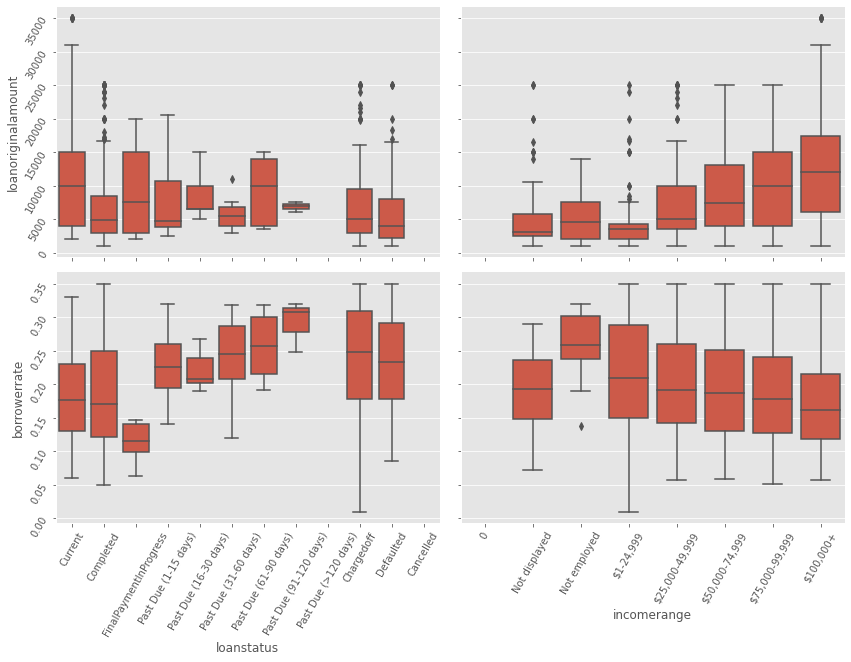

In [46]:
#Get as sample of 2000
fin_data_samp = fin_data.sample(n = 2000, replace = False)
#Get the default color
default_color = sb.color_palette()[3]
#Create a function
def boxgrid(x,y , **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)
#Get the size
plt.figure(figsize = (10,10))
#Plot the graph
g = sb.PairGrid(data = fin_data_samp, y_vars=['loanoriginalamount','borrowerrate'], x_vars=['loanstatus', 'incomerange'], size = 4, aspect =1.5)
g.map(boxgrid, color = default_color)
#Rotate the graphs x axis
for ax in g.axes.flatten():
    ax.tick_params(rotation = 60)
plt.show()

The boxplot shows interesting relationships between the four variables. It can be observed that the interest rate of those loans which were charged off was high while those that were overdue with 16 and 30 days had a high borrower rate. It can be observed that loans which were completed had the lowest original amount while those that were current had the highest loan amount. The loans which were defaulted had a relatively low loan orginal amount while those with a final payment in progress had a high orginal amount and a relatively low borrower rate. It can be seen that the borrower rate and income range have an inverse relationship as the lower the income range the higher the borrower rate. Therefore, people who earn higher are given a lower borrower rate. Those who are not employed have a higher borrower rate which should be examined. More so, the  higher the income range the higher the loan orginal amount hence a positive relationship. A borrower with a higher income stream will likely be given a higher loan amount.

Question 6: What is the count on income range and employment status by loan and employment status?

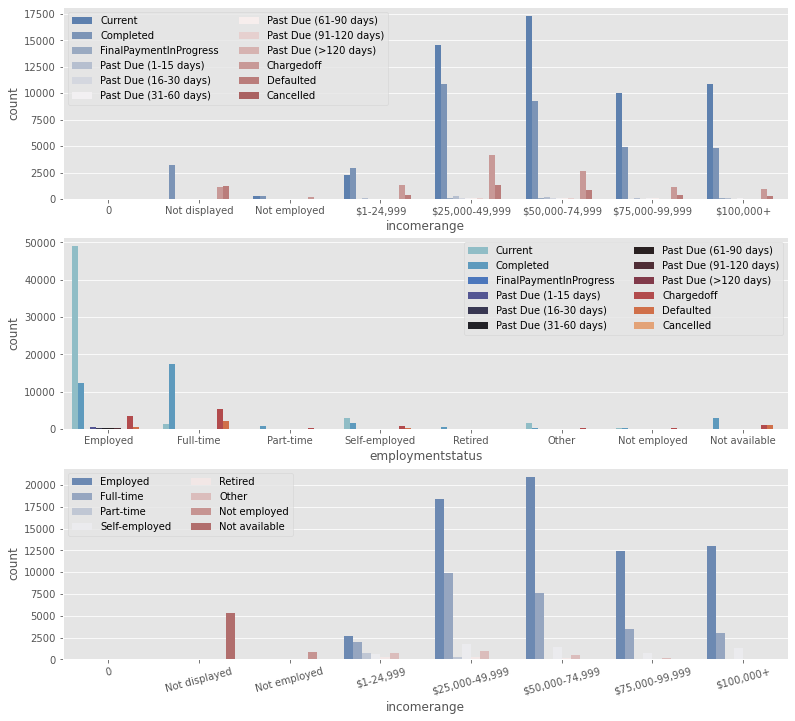

In [47]:
#Get the size
plt.figure(figsize = (13,12))

#Plot the respective plots
#plot 1
ax =plt.subplot(3,1,1)
sb.countplot(data = fin_data, x = 'incomerange', hue = 'loanstatus', palette = 'vlag')
ax.legend(loc = 2, ncol = 2)
#plot 2
ax = plt.subplot(3,1,2)
sb.countplot(data = fin_data, x = 'employmentstatus', hue = 'loanstatus' , palette = 'icefire')
ax.legend(loc = 1, ncol = 2)
#plot 3
ax = plt.subplot(3,1,3)
sb.countplot(data = fin_data, x = 'incomerange', hue = 'employmentstatus' , palette = 'vlag')
ax.legend(loc = 2, ncol = 2)
#Rotate the X axis
plt.xticks(rotation = 15)
plt.show()

The first visual depicts that high income earners have pending loans which may be attributed to the low borrower rates they receive. Similarly, those in the first income bracket are more likely to complete their loan. More so, high income earners are equally likely to complete their loan payments while the rate of default and charged off loans decreases with an increase in income. Employed individuals can be seen as the majority who have current loans and those who are full time employed have completed their loan payments. The remaining category of employment status have lower borrowing propensity as well as repayment. The last visualization shows that majority of employed individuals are high income earners with a salary range of between 25000 and 100000 +. The number of employed people earning between 1-24999 is low while majority of those who are not employed are retired.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Bivariate relationships were established in the data and a strong and positive relationship was observed between lender yield and borrower rate while denoting the inverse relationship between debt to income ratio and total number of credit lines. Another key relationship was the inverse and direct relationship between borrower rate and loan orginal amount in comparison to the income range. The loan status in relation to the loan orginal amount and borrower rate varied and did not have static relationship.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I did like noting that most full time employees had cleared their loans while majority of current borrowers are emplyed individuals and most borrowers are high income earners with their defaulters decreasing as income increaseas and most employed and full time people earn between 25000 and 100000+ with majority of those not employed having retired.

## Multivariate Exploration



Question: What is the relationship between loan status, loan orginal amount, and monthly loan payments?

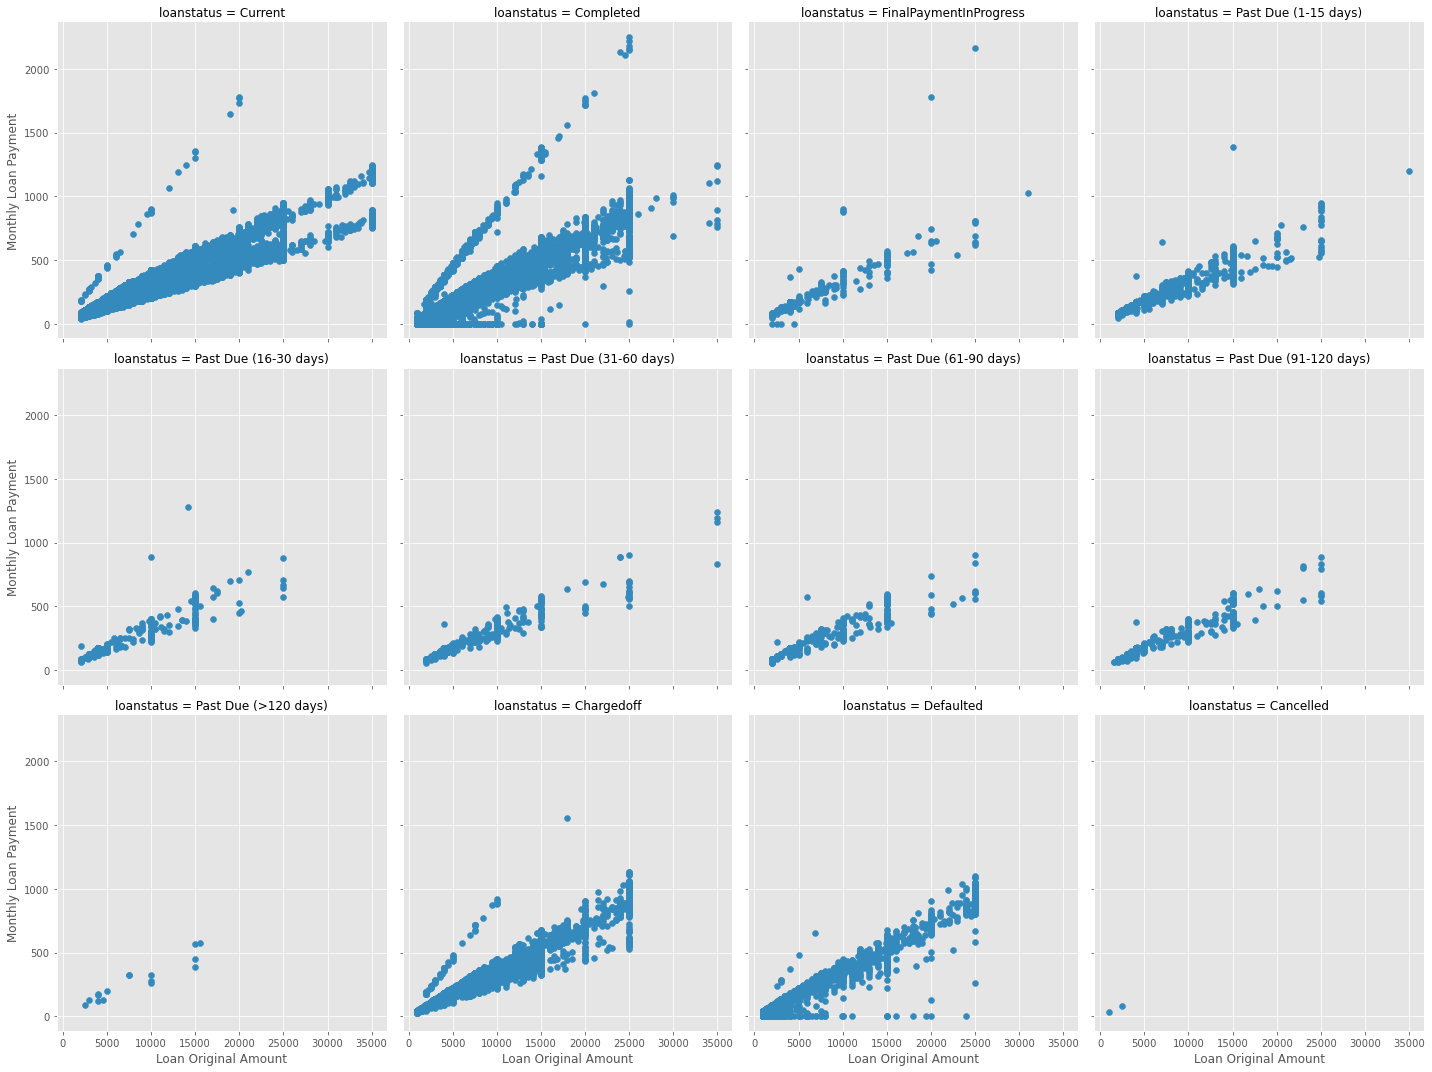

In [48]:
#Plot the FacetGrid
g = sb.FacetGrid(data = fin_data, col = 'loanstatus', col_wrap = 4, size = 5 , margin_titles = True)
#Get the default color
default_color = sb.color_palette()[1]
#Map the scatter plot
g.map(plt.scatter, 'loanoriginalamount','monthlyloanpayment', color = default_color)
#Set the X and Y Labels
g.set_xlabels('Loan Original Amount')
g.set_ylabels('Monthly Loan Payment')

It can be observed that the relationship between loan orginal amount and monthly payment is linear. However, the slope of the linear lines varies as some people opt to pay higher amounts on their loans compared to others. For instance, a good number of those with current loans are seen to pay higher on their monthly loa payments compared to the majority who pay between 200 and 800 dollars for loan orginal amount of between 500 and 25000 dollars. A similar linear and positive relationship can be seen on those who have completed their loans paying a high monthly amount on lower original amounts of between 0 and 5000 dollars while some borrowers also opt to pay more when their loan original amount increases. However, majorirty of borrowers opt to pay between 200 and 800 dollars for their monthly loan payments with a few paying slightly higher to 1000 dollars. Similarly, those whose loans were charged off showed that they were unable to meet their monthly payment despite their loan original amount. Therefore, majority of these people monthly payment was between 0 and 1000 dollars with borrowers with low orginal loan amount attempting to pay higher with an exception of one. Therefore, it is important to scrutinize further the reason behind the charge off. More so, defualters can be seento struggle to meet their monthly payments despite the low borrowing capacity. Most of the people who defaulted paid monthly payments of between 0 and 600 dollars with a few people paying very low on their monthly payments despite high orgina amounts. Therefore a person who opts to take a high loan and pays very low monthly payments can be a red flag for borrowers as they may default. Individuals whose final payment is in progress are relatively lo and the trend appears to be similar to the completed and borrowers with current loans. For people with overdue loans it shows an almost consistent strong positive relationship with a few outliers where an increase in the loan orginal amount increases the monthly loan payment with majority of people monthly payments between 0 and 1000. 

Question: Determine the relationship between loan status, employmentstattus duration by employment status?

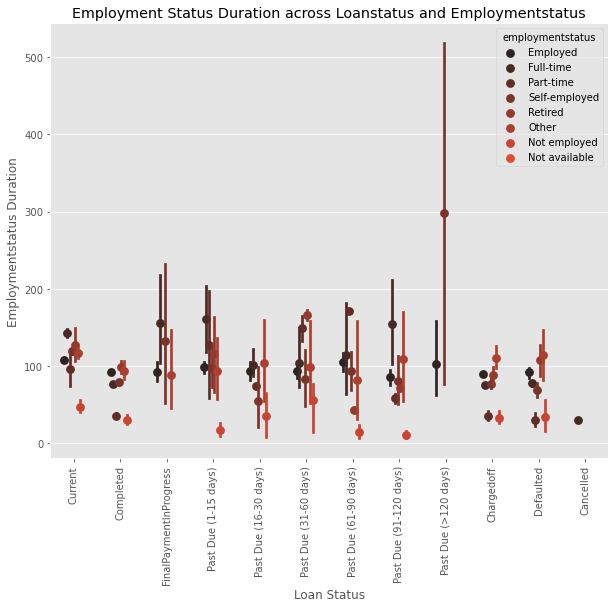

In [49]:
#Get the size
plt.figure(figsize = (10,8))
#Get the default_color 
default_color = sb.color_palette()[0]
#Plot the Lineplot
sb.pointplot(data = fin_data, x = 'loanstatus', y = 'employmentstatusduration', hue = 'employmentstatus', linestyles = '', dodge = 0.4, color = default_color)
#Set the title & Label the axis
plt.title('Employment Status Duration across Loanstatus and Employmentstatus')
plt.xlabel('Loan Status')
plt.ylabel('Employmentstatus Duration')
#Rotate the X axis
plt.xticks(rotation = 90)
plt.show()

In [50]:
fin_data[fin_data['employmentstatusduration'] == 580]

,listingcreationdate,term,loanstatus,closeddate,borrowerrate,lenderyield,prosperscore,borrowerstate,occupation,employmentstatus,...,isborrowerhomeowner,totalcreditlinespast7years,delinquencieslast7years,debttoincomeratio,incomerange,incomeverifiable,statedmonthlyincome,loanoriginalamount,monthlyloanpayment,LoanYear
LoanOriginationDate,,,,,,,,,,,,,,,,,,,,,
13-07-12,NaN,36,Current,NaN,0.1902,0.1802,5.0,TX,Sales - Commission,Self-employed,...,True,40.0,15.0,NaN,"$75,000-99,999",False,6680.166667,5000,183.33,NaN


The graph depicts an interesting relationship where those with current loans and work full time have the longest employment duration followed by retirees while those not employed have the lowest employment duration across most of the loan status. Individuals who have completed their loans are retirees, employed, other, and self-employed individuals who are willing to work while those who are not employed have the least  employment duration. Loan defaulters are others and have the longest employment duration followed by retirees who have worked for a longer period too. Employed people, part time, and self employed individuals are also prone to defualt despit working for a  long time. Therefore, other metrics should be evaluated alongside employment status and duration to help show if the person will be given a loan. An sharp rise develops among self employed people whose loan is ovedue by 120 days and have a longer employment duration as compared to employed people. Therefore, the sharp trend needsto be examined if its a  practical issue or the data may be accuracy issues. More so,  some people with ovedue loans have a longer employment status and full time appear to delay their loan payments and this may be as a result of delay salary payment or other commitments. Full time are equally seen to be the ones with cancelled loans and have a low employment status duration.

Question 3: What is the relationship between term, stated monthly, income, and debt to income ratio?

In [51]:
fin_data['debttoincomeratio'].describe()

count    101824.000000
mean          0.277591
std           0.555220
min           0.000000
25%           0.150000
50%           0.220000
75%           0.320000
max          10.010000
Name: debttoincomeratio, dtype: float64

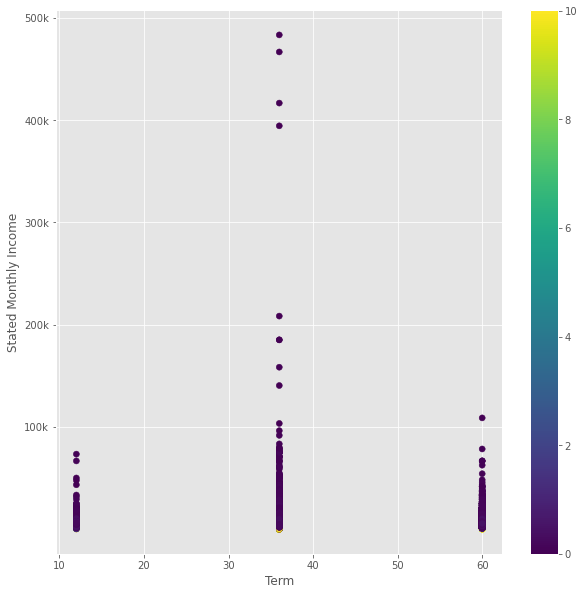

In [52]:
#Get the size
plt.figure(figsize = (10,10))
#Plot the scatter plot
ax = plt.scatter(data = fin_data, x = 'term', y = 'statedmonthlyincome', c = 'debttoincomeratio')
#Label the x and y axis
plt.xlabel('Term')
plt.ylabel('Stated Monthly Income')
#Get y ticks
plt.yticks([1e5, 2e5,3e5, 4e5, 5e5], ['100k', '200k', '300k','400k', '500k'])
plt.colorbar()

The relationship shows that people with a low debt to income ratio, with income below 100k take both short (<20), medium (<40), and long (<60). It can also be depicted that individuals with higher income between 100k and 200k have a generally take medium term loans of 35 terms. Therefore, most people have a low debt to income ratio with an average of 0.27 which is good and recommended by borrowers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> One of the significant relationships that I observed was that defualters struggled to pay their loan monthly payment depsite their low loan orginal amount. Similarly, most people with current loans and higher loan orginal amounts pay monthly payments of between 200 and 800 dollars. Borrowers who have completed their payments pay higher monthly payments on loan orginal amount  with a few with higher loan orginal amount paying a higher monthly payments amount with majority paying between 200. More so, those with overdue loans pay in most cases the loan for lower orginal amount loans and higher for high orginal amount loans. he employment status and employment status duration revealed to be a weak measurement of borrower capacity as defualters cut across despite working for sometime and also those who had worked for long as full time had overdue loans. Therefore, employment status and duration should be supported by another metric such as debt to income ratio or  their delinquencies i the past 7 years to determine their credit worthiness. Actually, most boorowers who have completed their loans have a lower employment status duration. The debt to income ratio shows that most borrowers have a low debt to income ratio which is good with higher income earners opting to take medium term loans (35). Therefore, debt to income ratio for most borrowers is positive.
### Were there any interesting or surprising interactions between features?

> A high spike in the self-eployed individuals with an overdue loan existed which seemed like an accuracy issue or outlier but the matter needs to be explored further, despite them having a longer employment duration.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
The steps taken included primary data wrangling to assess, clean, and ensure the data is tidy and of high quality.
The main findings from the data set include:
 
    1.Most borrowers are those with current pending loans as compared to those who have completed their loans or defaulted
    
    2.A positive and strong relationship exists between the lender yield and borrower rate

    3.The income range and borrower rate have an inverse relatioship while the income range and loan original amount have a       positive relationship.

    4.Most employed people have current loans running and also also earn high income earners
 


END OF PART I
